In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [3]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print dataset information
print("Training data shape:", x_train.shape, y_train.shape)
print("Testing data shape:", x_test.shape, y_test.shape)


Training data shape: (60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)


In [4]:
# Reshape input data to 4D tensor with shape (batch_size, height, width, channels)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convert class labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [5]:

# Build CNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))


In [6]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 22s 6ms/step - loss: 0.5863 - accuracy: 0.8465 - val_loss: 0.0885 - val_accuracy: 0.9748
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1460 - accuracy: 0.9592 - val_loss: 0.0569 - val_accuracy: 0.9830
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1091 - accuracy: 0.9696 - val_loss: 0.0452 - val_accuracy: 0.9857
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0855 - accuracy: 0.9758 - val_loss: 0.0466 - val_accuracy: 0.9870
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0765 - accuracy: 0.9782 - val_loss: 0.0408 - val_accuracy: 0.9877
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0662 - accuracy: 0.9809 - val_loss: 0.0440 - val_accuracy: 0.9852
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0626 - accuracy: 0.9824 - val_loss: 0.0461 - val_ac

In [7]:

# Print training and testing accuracy
train_acc = history.history['accuracy'][-1]
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Training accuracy:', train_acc)
print('Testing accuracy:', test_acc)


Training accuracy: 0.9850166440010071
Testing accuracy: 0.9894999861717224


1/1 [==============================] - 0s 341ms/step
Random image prediction:
Predicted label: 9
Ground truth label: 9


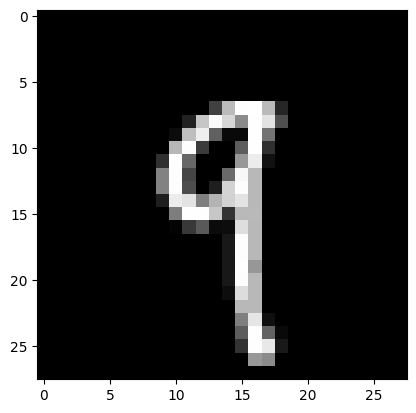

Input image:


In [8]:

# Select a random image from test set and predict its label
import random
from matplotlib import pyplot as plt
import numpy as np

rand_idx = random.randint(0, len(x_test)-1)
rand_img = np.expand_dims(x_test[rand_idx], axis=0)
pred_label = np.argmax(model.predict(rand_img))

# Print predicted label and ground truth label for the random image
print("Random image prediction:")
print("Predicted label:", pred_label)
print("Ground truth label:", np.argmax(y_test[rand_idx]))

plt.imshow(x_test[rand_idx], cmap='gray')
plt.show()
print('Input image:')
plt.show()